The primary objective of this exploratory data analysis (EDA) project is to uncover insights from Hillary Clinton's emails using NLP and statistical methods. The project aims to:

1) Identify the common topics discussed using TF-IDF
2) Understand the network of senders and recipients to identify key figures and their relationships.
   Explore the frequency and patterns of email communications over time.


**Data Cleaning and Preprocessing:** This initial step involves cleaning the dataset for analysis, including handling missing values, removing duplicates, and standardizing date formats. NLP-specific preprocessing will also be necessary, such as tokenization, removing stopwords, and lemmatization.

**Exploratory Data Analysis:** Employing statistical and visualization techniques to summarize the dataset's main characteristics. This includes analyzing the distribution of emails over time, the most frequent senders and recipients, and the length of emails.

**TF-IDF:** Using NLP techniques such as TF-IDF or count vectorization generate a list of the five TF-IDF terms that best describe the emails. This can provide insights into the main topics and themes discussed in the emails.

**Temporal Analysis:** Investigate how email communications change over time, identify any patterns or anomalies in the volume of emails sent and received, and correlate these with external events or timelines.


**Imports**

In [1]:
import pandas as pd
import numpy as np
import sklearn
import gensim as gensim
import matplotlib.pyplot as plt


c:\Users\Yera\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Read csv file**

In [2]:
emails = pd.read_csv("Emails.csv")

**(1a) Data Cleaning: General** 

Handling Missing Values

In [3]:
emails['ExtractedBodyText'].fillna('null', inplace=True)

In [4]:
emails

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,null,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: La...",UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,null,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\r\nFriday, March 1...",B6\r\nUNCLASSIFIED\r\nU.S. Department of State...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7940,7941,C05778462,WYDEN,H,"Verma, Richard R",180.0,2010-12-16T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,NaN,"Verma, Richard R <VermaRR@state.gov>",NaN,"Thursday, December 16, 2010 7:41 PM",F-2014-20439,C05778462,08/31/2015,RELEASE IN PART,null,UNCLASSIFIED U.S. Department of State Case No....
7941,7942,C05778463,SENATE,H,"Verma, Richard R",180.0,2010-12-16T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,NaN,"Verma, Richard R <VermaRR@state.gov>","Sullivan, Jacob J; Mills, Cheryl D; Abedin, Huma","Thursday, December 16, 2010 8:09 PM",F-2014-20439,C05778463,08/31/2015,RELEASE IN FULL,Big change of plans in the Senate. Senator Rei...,UNCLASSIFIED U.S. Department of State Case No....
7942,7943,C05778465,RICHARD (TNR),H,"Jiloty, Lauren C",116.0,2010-12-16T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,NaN,"Jiloty, Lauren C <JilotyLC@state.gov>",NaN,"Thursday, December 16, 2010 10:52 PM",F-2014-20439,C05778465,08/31/2015,RELEASE IN PART,null,UNCLASSIFIED U.S. Department of State Case No....
7943,7944,C05778466,FROM,H,PVerveer,143.0,2012-12-17T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,"PVervee,",NaN,NaN,12/14/201,F-2014-20439,C05778466,08/31/2015,RELEASE IN PART,"PVerveer B6\r\nFriday, December 17, 2010 12:12...","Hi dear Melanne and Alyse,\r\nHope this email ..."


**Removing Duplicates**

There are no complete duplicates, which is good.

In [5]:
# Detect and display duplicate rows based on all columns
duplicate_rows = emails[emails.duplicated()]

In [6]:
duplicate_rows

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText


Duplicate Body Text: FYI and ok with varying case are the most commonly repeated messages.

In [7]:
# Exclude rows with 'null' in 'ExtractedBodyText'
filtered_emails = emails[emails['ExtractedBodyText'] != 'null']

# Detect and display duplicate rows based on the 'ExtractedBodyText' column
duplicate_body = filtered_emails[filtered_emails.duplicated(subset='ExtractedBodyText', keep=False)]

# Display the duplicate rows
duplicate_body



,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
8,9,C05739562,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739562...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivanli@stategov>",NaN,"Wednesday, September 12, 2012 6:08 PM",F-2015-04841,C05739562,05/13/2015,RELEASE IN FULL,FYI,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
9,10,C05739563,MORE ON LIBYA,H,NaN,NaN,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739563...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739563,05/13/2015,RELEASE IN PART,"B6\r\nWednesday, September 12, 2012 6:16 PM\r\...",UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
11,12,C05739565,MORE ON LIBYA,H,NaN,NaN,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739565...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739565,05/13/2015,RELEASE IN PART,"B6\r\nWednesday, September 12, 2012 6:16 PM\r\...",UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
12,13,C05739567,HEY,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739567...,F-2015-04841,...,NaN,"Sullivan, Jacob J <SullivanJJ@state.gov>",NaN,"Wednesday, September 12 2012 700 PM",F-2015-04841,C05739567,05/13/2015,RELEASE IN PART,Fyi,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,7865,C05777843,QUOTER ABOUT MITCH MCCONNELL,H,"Sullivan, Jacob J",87.0,2010-12-08T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0112/DOC_0C0...,F-2014-20439,...,NaN,"Sullivan, Jacob J <SullivanJJ@state.gov>",NaN,"Wednesday, December 8, 2010 7:23 PM",F-2014-20439,C05777843,08/31/2015,RELEASE IN PART,FYI,UNCLASSIFIED U.S. Department of State Case No....
7869,7870,C05777878,ANNE MULCAHY,H,"Abedin, Huma",81.0,2010-12-09T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0112/DOC_0C0...,F-2014-20439,...,H; 'abedinh@state.gov'; 'woodardew@state.gov',Huma Abedin,NaN,"Thursday, December 9, 2010 6:10 AM",F-2014-20439,C05777878,08/31/2015,RELEASE IN PART,Ok,UNCLASSIFIED U.S. Department of State Case No....
7903,7904,C05778357,IRAN DAILY SPECIAL REPORT: FM MOTTAKI REMOVED,H,"Sullivan, Jacob J",87.0,2010-12-13T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0112/DOC_0C0...,F-2014-20439,...,H,"Sullivan, Jacob J <SullivanJJ@state.gov>",S_SpecialAssIstants,"Monday, December 13, 2010 8:50 AM",F-2014-20439,C05778357,08/31/2015,RELEASE IN FULL,Fyi,UNCLASSIFIED U.S. Department of State Case No....
7921,7922,C05778420,#1 SOCIAL MEDIA CAMPAIGN OF 2010,H,"Mills, Cheryl D",32.0,2010-12-15T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>",NaN,"Wednesday, December 15, 2010 12:06 AM",F-2014-20439,C05778420,08/31/2015,RELEASE IN PART,Fyi,UNCLASSIFIED U.S. Department of State Case No....


In [8]:
# Exclude rows with 'null' in 'ExtractedBodyText'
filtered_emails = emails[emails['ExtractedBodyText'] != 'null']

# Group by 'ExtractedBodyText' and count occurrences
duplicate_counts = filtered_emails['ExtractedBodyText'].value_counts()

# Create a DataFrame with 'ExtractedBodyText' and its corresponding counts
duplicate_counts_df = pd.DataFrame({'ExtractedBodyText': duplicate_counts.index, 'Occurrences': duplicate_counts.values})

# Display the DataFrame
duplicate_counts_df.head(20)


,ExtractedBodyText,Occurrences
0,Fyi,174
1,FYI,156
2,Ok,76
3,fyi,64
4,Ok.,39
5,Pls print.,32
6,Will do.,30
7,Yes,15
8,Pis print.,14
9,FYI.,13


**Standardizing Date Formats**

ExtractedDateSent was standardized because it needs to understand patterns in the volume of emails sent.

In [9]:
emails['ExtractedDateSent'] = emails['ExtractedDateSent'].replace('null', pd.NaT)
emails['ExtractedDateSent'] = pd.to_datetime(emails['ExtractedDateSent'], errors='coerce', infer_datetime_format=True)
emails.set_index('ExtractedDateSent', inplace=True)


In [10]:
emails

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
ExtractedDateSent,,,,,,,,,,,,,,,,,,,,,
2012-09-12 10:16:00,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,null,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
NaT,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: La...",UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
2012-09-12 11:52:00,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
NaT,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,null,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
NaT,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\r\nFriday, March 1...",B6\r\nUNCLASSIFIED\r\nU.S. Department of State...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-16 07:41:00,7941,C05778462,WYDEN,H,"Verma, Richard R",180.0,2010-12-16T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,Fw: Wyden,NaN,"Verma, Richard R <VermaRR@state.gov>",NaN,F-2014-20439,C05778462,08/31/2015,RELEASE IN PART,null,UNCLASSIFIED U.S. Department of State Case No....
2010-12-16 08:09:00,7942,C05778463,SENATE,H,"Verma, Richard R",180.0,2010-12-16T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,Senate,NaN,"Verma, Richard R <VermaRR@state.gov>","Sullivan, Jacob J; Mills, Cheryl D; Abedin, Huma",F-2014-20439,C05778463,08/31/2015,RELEASE IN FULL,Big change of plans in the Senate. Senator Rei...,UNCLASSIFIED U.S. Department of State Case No....
2010-12-16 10:52:00,7943,C05778465,RICHARD (TNR),H,"Jiloty, Lauren C",116.0,2010-12-16T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,Re: Fwd: FW: Richard (TNR),NaN,"Jiloty, Lauren C <JilotyLC@state.gov>",NaN,F-2014-20439,C05778465,08/31/2015,RELEASE IN PART,null,UNCLASSIFIED U.S. Department of State Case No....


**(1b) NLP Specific Processing:** Tokenization, Removing Stopwords and Lemmatization

The lemmatizer is adapted from class notes. There may be a way to integrate the bigrams with the lemmatizer.

In [11]:
# We can use NLTK to tokenize and lemmatize our text
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

# Create instances of the stemmer
stemmer = PorterStemmer()

# For stopwords we will add punctuation
punct = list(string.punctuation) + list(string.digits) 
# null = list('null')  #neither of these methods
stop_words = stopwords.words('english') + punct + ['null']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Create a list to store processed data
corpus = []

# Iterate over the rows in the 'emails' DataFrame
for index, row in emails.iterrows():
    # Extract ID and content from the DataFrame
    email_id = row['Id']
    email_content = row['ExtractedBodyText']
    
    # Tokenize and lemmatize the text
    tokens = word_tokenize(email_content)
    tokens = [stemmer.stem(token.lower()) for token in tokens if token.isalpha()]
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Append ID and processed text to the corpus list
    corpus.append([email_id, ' '.join(tokens)])

In [13]:
corpus

[[1, ''],
 [2,
  'thursday march pm h latest syria aid qaddafi sid hrc memo syria aid libya hrc memo syria aid libya march hillari'],
 [3, 'thx'],
 [4, ''],
 [5,
  'h friday march pm huma abedin fw h latest syria aid qaddafi sid hrc memo syria aid libya pi print'],
 [6,
  'pi print h clintonernailcom wednesday septemb pm fw meet extremist behind film spark deadli riot meat sent wednesday septemb pm subject meet right wing extremist behind film spark deadli riot sent verizon wireless lte droid depart state case doc date state dept produc hous select benghazi comm subject agreement sensit inform redact foia waiver'],
 [7, ''],
 [8,
  'h friday march pm huma abedin fw h latest syria aid qaddafi sid hrc memo syria aid libya pi print'],
 [9, 'fyi'],
 [10,
  'wednesday septemb pm fwd libya libya sept send direct sent verizon wireless lte druid'],
 [11, 'fyi'],
 [12,
  'wednesday septemb pm fwd libya libya sept send direct sent verizon wireless lte druid'],
 [13, 'fyi'],
 [14,
  'slaughter su

Function to iterate over the text to extract our lemmas

In [14]:
def tokenize_lemmatize_text(text):
    lemmas = []  # Create a local list to store tokens for each text
    tokens = word_tokenize(text)
    for token in tokens:
        if token in stop_words:
            continue
        else:
            lemmas.append(stemmer.stem(token))
    return lemmas


Testing on one email for clarity.

In [15]:
# Assuming 'corpus' is your list of emails and 'tokenize_lemmatize_text' is the modified function

# Retrieve the content of the third email
third_email_content = corpus[2][1]  # Index 2 corresponds to the third element (0-based index)

# Call the function to get lemmas for the third email
third_email_lemmas = tokenize_lemmatize_text(third_email_content)

# Print the lemmas
print(third_email_lemmas)


['thx']


In [16]:
# Initialize a defaultdict to store bigram counts
bigram_freqs = {}

# Iterate over each email in the corpus
for _, email_content in corpus:
    # Tokenize and lemmatize the email content
    email_token_lemmas = tokenize_lemmatize_text(email_content)

    # Create a list of bigrams
    email_bigrams = [(email_token_lemmas[i], email_token_lemmas[i + 1]) for i in range(len(email_token_lemmas) - 1)]

    # Update the bigram frequencies
    for bigram in email_bigrams:
        bigram_freqs[bigram] = bigram_freqs.get(bigram, 0) + 1

# Create a DataFrame from the bigram frequencies
df = pd.DataFrame(list(bigram_freqs.items()), columns=['bigram', 'freq'])

# Sort the DataFrame by frequency in descending order
df = df.sort_values(by='freq', ascending=False)

# Expand bigrams into separate columns
df[['first_term', 'second_term']] = pd.DataFrame(df['bigram'].tolist(), index=df.index)


The top 50 most frequently appearing bigrams provide useful combinations. There may be a method to include these in the lemmatizer.

In [17]:
df.head(50)


,bigram,freq,first_term,second_term
1771,"(secretari, offic)",461,secretari,offic
1764,"(state, depart)",457,state,depart
122,"(unit, state)",447,unit,state
1846,"(white, hou)",416,white,hou
50,"(depart, state)",400,depart,state
1762,"(en, rout)",314,en,rout
6389,"(pm, secretari)",279,pm,secretari
6401,"(offic, pm)",263,offic,pm
888,"(secretari, state)",258,secretari,state
2,"(pm, h)",229,pm,h


**(2) Exploratory Data Analysis**

In [18]:
emails.shape

(7945, 21)

Analyzing the distribution of emails over time

Most frequent senders and recipients

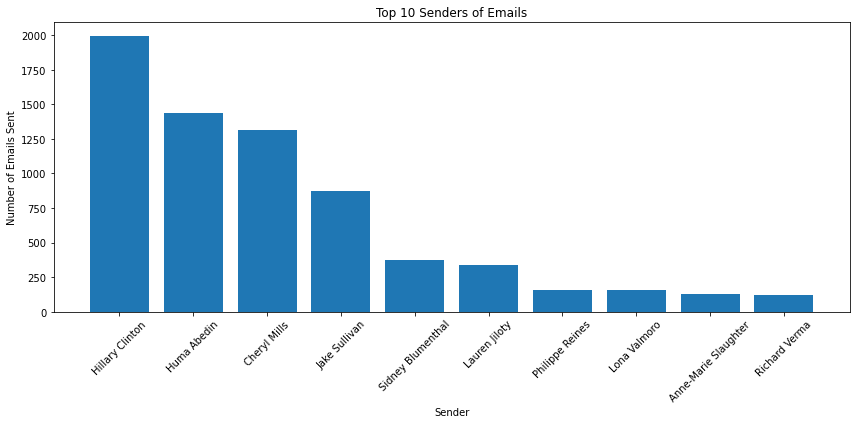

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
emails = pd.read_csv("Emails.csv")
persons = pd.read_csv("Persons.csv")

# Get the count of emails sent by each sender
senders_counts = emails['SenderPersonId'].value_counts().reset_index()
senders_counts.columns = ['SenderPersonId', 'EmailsSent']

# Merge with Persons.csv to get sender names
senders_counts = senders_counts.merge(persons, left_on='SenderPersonId', right_on='Id', how='left')

# Sort the data by the total count
senders_counts = senders_counts.sort_values(by='EmailsSent', ascending=False)

# Get the top 10 senders
top_senders = senders_counts.head(10)

# Plot for senders
plt.figure(figsize=(12, 6))
plt.bar(top_senders['Name'], top_senders['EmailsSent'])
plt.xlabel('Sender')
plt.ylabel('Number of Emails Sent')
plt.title('Top 10 Senders of Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


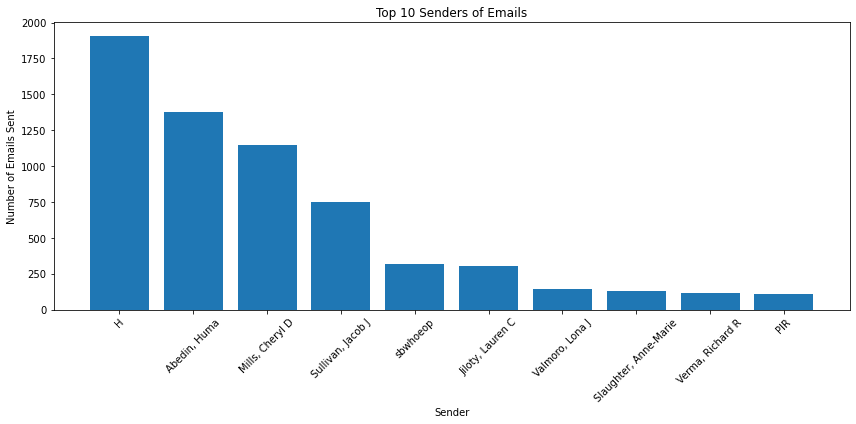

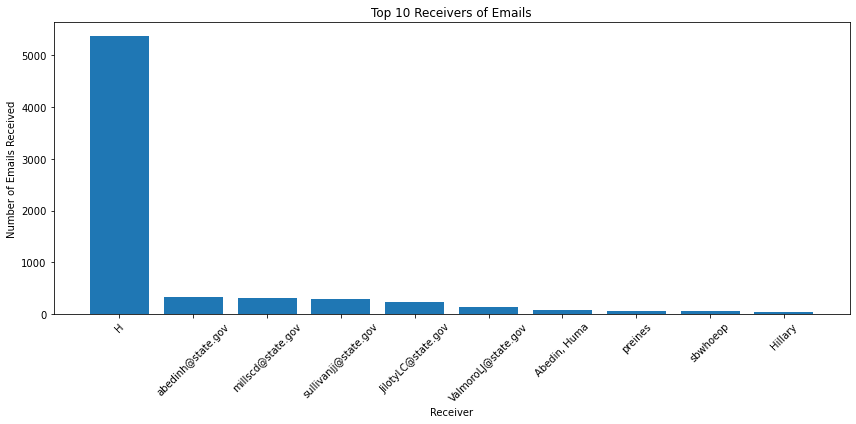

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
emails = pd.read_csv("Emails.csv")

# Get the count of emails sent by each sender
senders_counts = emails.groupby('MetadataFrom').size().reset_index(name='EmailsSent')
# Get the count of emails received by each receiver
receivers_counts = emails.groupby('MetadataTo').size().reset_index(name='EmailsReceived')

# Fill missing values with 0
senders_counts = senders_counts.fillna(0)
receivers_counts = receivers_counts.fillna(0)

# Sort the data by the total count
senders_counts = senders_counts.sort_values(by='EmailsSent', ascending=False)
receivers_counts = receivers_counts.sort_values(by='EmailsReceived', ascending=False)

# Get the top 10 senders and receivers
top_senders = senders_counts.head(10)
top_receivers = receivers_counts.head(10)

# Plot for senders
plt.figure(figsize=(12, 6))
plt.bar(top_senders['MetadataFrom'], top_senders['EmailsSent'])
plt.xlabel('Sender')
plt.ylabel('Number of Emails Sent')
plt.title('Top 10 Senders of Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for receivers
plt.figure(figsize=(12, 6))
plt.bar(top_receivers['MetadataTo'], top_receivers['EmailsReceived'])
plt.xlabel('Receiver')
plt.ylabel('Number of Emails Received')
plt.title('Top 10 Receivers of Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
# Function to tokenize and lemmatize text
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    lemmas = [stemmer.stem(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return lemmas

# Tokenize and lemmatize the 'ExtractedBodyText' column
emails['ProcessedText'] = emails['ExtractedBodyText'].apply(lambda x: tokenize_and_lemmatize(x) if isinstance(x, str) else [])

# Display the DataFrame with the processed text
print(emails[['ExtractedBodyText', 'ProcessedText']].head())

                                   ExtractedBodyText  \
0                                                NaN   
1  B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: La...   
2                                                Thx   
3                                                NaN   
4  H <hrod17@clintonemail.com>\r\nFriday, March 1...   

                                       ProcessedText  
0                                                 []  
1  [thursday, march, pm, h, latest, syria, aid, q...  
2                                              [thx]  
3                                                 []  
4  [h, friday, march, pm, huma, abedin, fw, h, la...  


Length of emails

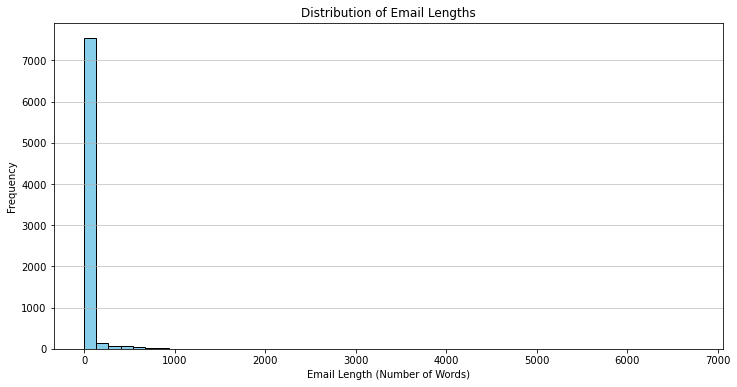

In [34]:
import matplotlib.pyplot as plt

# Calculate the length of each email (number of words)
emails['EmailLength'] = emails['ProcessedText'].apply(len)

# Plot the distribution of email lengths
plt.figure(figsize=(12, 6))
plt.hist(emails['EmailLength'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Email Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Email Lengths')
plt.grid(axis='y', alpha=0.75)
plt.show()


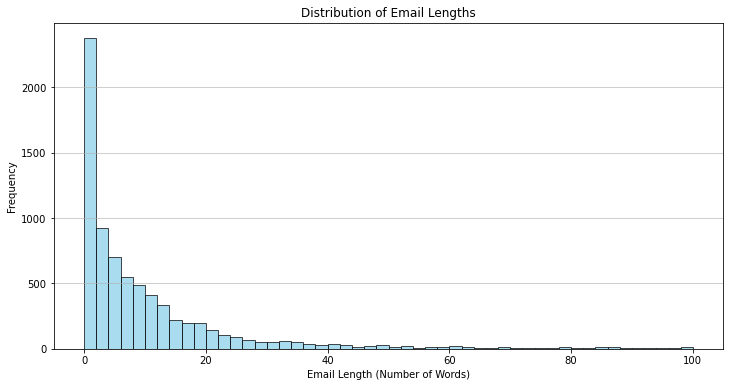

In [35]:
import matplotlib.pyplot as plt

# Set a cap for email length
cap = 100
filtered_lengths = [length for length in emails['EmailLength'] if length <= cap]

# Create a histogram
plt.figure(figsize=(12, 6))
plt.hist(filtered_lengths, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Email Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Email Lengths')
plt.grid(axis='y', alpha=0.75)
plt.show()


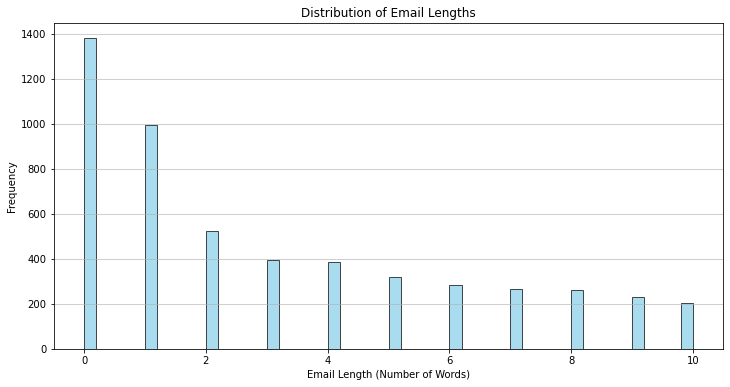

In [36]:
import matplotlib.pyplot as plt

# Set a cap for email length
cap = 10
filtered_lengths = [length for length in emails['EmailLength'] if length <= cap]

# Create a histogram
plt.figure(figsize=(12, 6))
plt.hist(filtered_lengths, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Email Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Email Lengths')
plt.grid(axis='y', alpha=0.75)
plt.show()


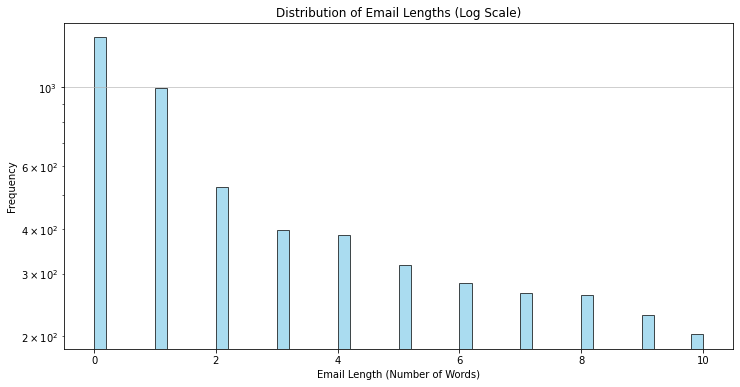

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Create a histogram with log scale
plt.figure(figsize=(12, 6))
plt.hist(filtered_lengths, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.yscale('log')  # Set y-axis scale to log
plt.xlabel('Email Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Email Lengths (Log Scale)')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [39]:
import pandas as pd

# First, filter out emails with missing body text
filtered_emails = emails.dropna(subset=['ExtractedBodyText'])

# Calculate the length of each email
filtered_emails['EmailLength'] = filtered_emails['ExtractedBodyText'].apply(lambda x: len(x.split()))

# Calculate the average email length for each sender
avg_length_per_sender = filtered_emails.groupby('MetadataFrom')['EmailLength'].mean().reset_index()

# Sort senders by average email length in descending order
top_senders_lengthy_emails = avg_length_per_sender.sort_values(by='EmailLength', ascending=False).head(10)

# Display the top 10 senders of lengthy emails
print(top_senders_lengthy_emails)


            MetadataFrom  EmailLength
131     Philippe, Reines  4887.000000
32               Chelsea  3492.000000
91        Lewis, Reta Jo  2336.000000
150                Sandy  2288.000000
124      Newmyer, Jackie  1129.250000
36     Coleman, Claire L  1040.833333
140  Reines, Phillippe I  1026.000000
137     Reines, Philippe   801.000000
211             sbwhoeop   728.496753
48       Farrow, Jeffrey   716.000000


C:\Users\Yera\AppData\Local\Temp\ipykernel_18616\1427694282.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_emails['EmailLength'] = filtered_emails['ExtractedBodyText'].apply(lambda x: len(x.split()))


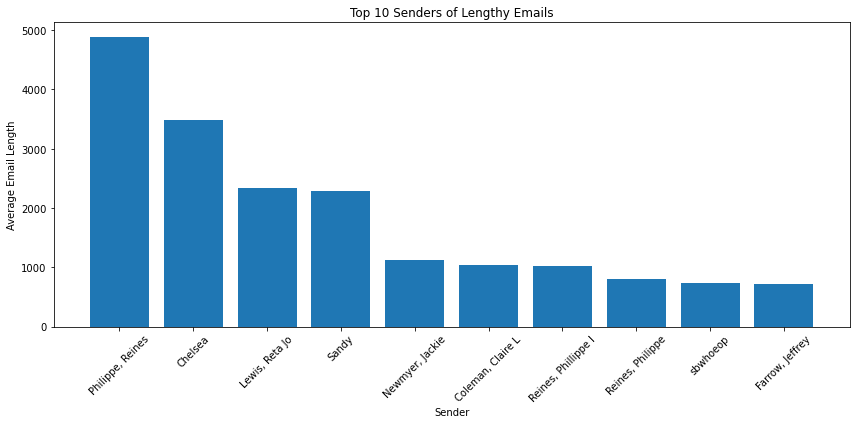

In [40]:
import matplotlib.pyplot as plt

# Plot the top 10 senders of lengthy emails
plt.figure(figsize=(12, 6))
plt.bar(top_senders_lengthy_emails['MetadataFrom'], top_senders_lengthy_emails['EmailLength'])
plt.xlabel('Sender')
plt.ylabel('Average Email Length')
plt.title('Top 10 Senders of Lengthy Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


c:\Users\Yera\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname OM identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
c:\Users\Yera\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname I identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


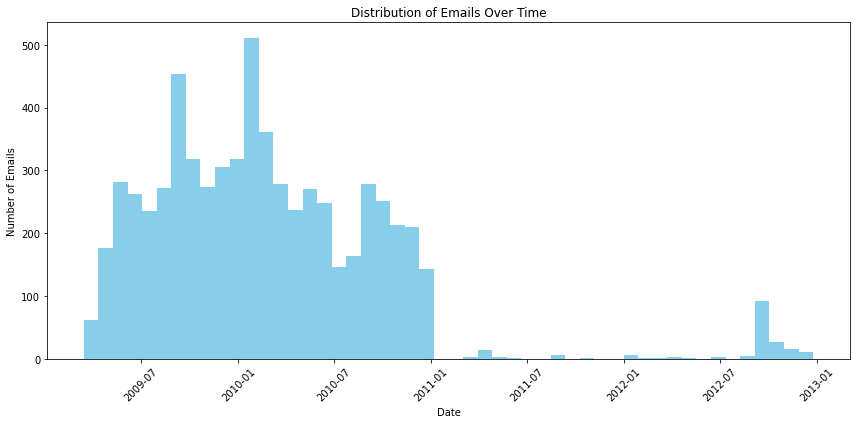

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'emails' is your DataFrame
# Convert 'ExtractedDateSent' to datetime format
emails['ExtractedDateSent'] = pd.to_datetime(emails['ExtractedDateSent'], errors='coerce')

# Drop rows where 'ExtractedDateSent' is missing or not a valid date
emails = emails.dropna(subset=['ExtractedDateSent'])

# Plot the distribution of emails over time
plt.figure(figsize=(12, 6))
plt.hist(emails['ExtractedDateSent'], bins=50, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.title('Distribution of Emails Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Yera\AppData\Local\Temp\ipykernel_18616\3943374788.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails['ExtractedDateSent'] = pd.to_datetime(emails['ExtractedDateSent'], errors='coerce')


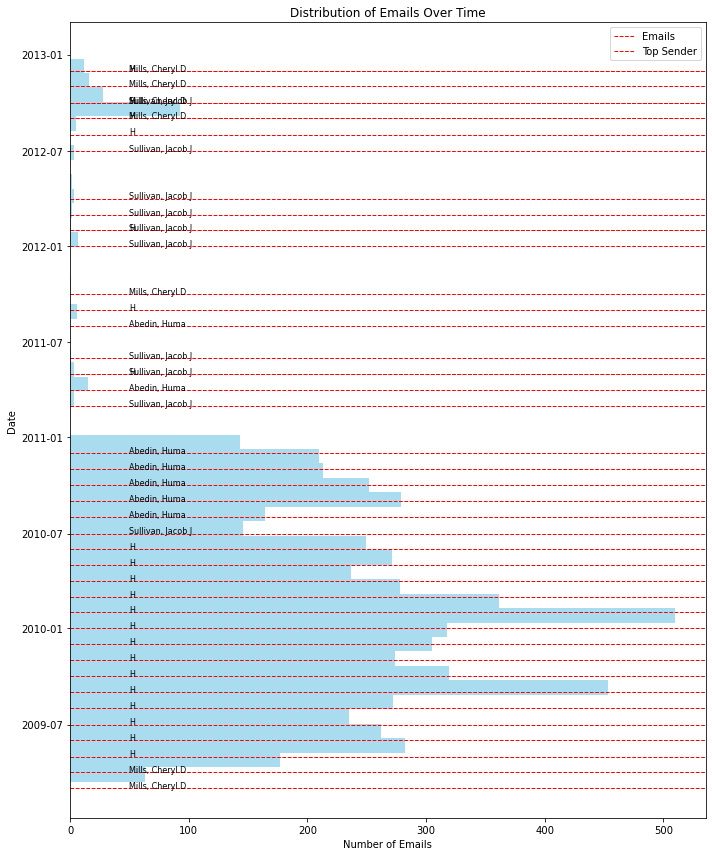

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'emails' is your DataFrame
# Convert 'ExtractedDateSent' to datetime format
emails['ExtractedDateSent'] = pd.to_datetime(emails['ExtractedDateSent'], errors='coerce')

# Drop rows where 'ExtractedDateSent' is missing or not a valid date
emails = emails.dropna(subset=['ExtractedDateSent'])

# Group by sender and time period (e.g., month)
emails['YearMonth'] = emails['ExtractedDateSent'].dt.to_period('M')
grouped = emails.groupby(['YearMonth', 'MetadataFrom']).size().reset_index(name='EmailsSent')

# Find the sender who sent the most emails in each time period
idx = grouped.groupby(['YearMonth'])['EmailsSent'].transform(max) == grouped['EmailsSent']
top_senders = grouped[idx]

# Plot the distribution of emails over time
plt.figure(figsize=(10, 12))
plt.hist(emails['ExtractedDateSent'], bins=50, color='skyblue', alpha=0.7, orientation='horizontal')
plt.ylabel('Date')
plt.xlabel('Number of Emails')
plt.title('Distribution of Emails Over Time')

# Mark the top sender for each time period
for _, row in top_senders.iterrows():
    plt.axhline(row['YearMonth'].to_timestamp(), color='red', linestyle='dashed', linewidth=1)
    plt.text(50, row['YearMonth'].to_timestamp(), row['MetadataFrom'], fontsize=8)

plt.legend(['Emails', 'Top Sender'])
plt.tight_layout()
plt.show()


**(3) TF-IDF**

Using NLP techniques such as TF-IDF or count vectorization generate a list of the five TF-IDF terms that best describe the emails. 

A variety of methods were used to generate terms that describe the topics. However, most of the words are filler words like fyi, ok, thi, pm, ye. Using SpaCy to remove all non-noun tokens may be a good idea.

In [21]:
# Assuming 'corpus' is your list of emails and 'tokenize_lemmatize_text' is your lemmatization function

# Create an empty list to store the lemmatized tokens
lemmas_list = []

# Iterate over each item in the corpus
for docID, content in corpus:
    # Apply tokenize_lemmatize_text to lemmatize the content
    lemmas = tokenize_lemmatize_text(content)
    
    # Append the lemmatized tokens to the list as a single tuple (docID, lemmas)
    lemmas_list.append((docID, lemmas))

# Create a DataFrame from the list of tuples
lemmas_df = pd.DataFrame(lemmas_list, columns=['docID', 'lemmas'])

# Continue with the rest of the TF-IDF calculations...


In [22]:
# Assuming 'corpus' is your list of emails and 'tokenize_lemmatize_text' is your lemmatization function

# Create an empty list to store the lemmatized tokens
lemmas_list = []

# Iterate over each item in the corpus
for docID, content in corpus:
    # Apply tokenize_lemmatize_text to lemmatize the content
    lemmas = tokenize_lemmatize_text(content)
    
    # Append the lemmatized tokens to the list as a single tuple (docID, lemmas)
    lemmas_list.append((docID, lemmas))

# Create a DataFrame from the list of tuples
lemmas_df = pd.DataFrame(lemmas_list, columns=['docID', 'lemmas'])

# Continue with the TF-IDF calculations
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine lemmatized tokens into a single string per document
lemmas_df['text'] = lemmas_df['lemmas'].apply(lambda x: ' '.join(x))

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(lemmas_df['text'])

# Create DataFrame with TF-IDF values
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add 'docID' column to the TF-IDF DataFrame
tfidf_df['docID'] = lemmas_df['docID']




TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract lemmatized text from the DataFrame
lemmatized_text = lemmas_df['lemmas'].apply(lambda lemmas: ' '.join(lemmas))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_text)

# Get the top terms based on their average TF-IDF scores across documents
average_tfidf_scores = tfidf_matrix.mean(axis=0).A1
top_terms_indices = average_tfidf_scores.argsort()[-5:][::-1]
top_terms = [tfidf_vectorizer.get_feature_names_out()[idx] for idx in top_terms_indices]

# Display the top 5 terms
print("Top 5 TF-IDF Terms:", ', '.join(top_terms))


Top 5 TF-IDF Terms: fyi, ok, thi, pm, ye


Count Vectorization

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract lemmatized text from the DataFrame
lemmatized_text = lemmas_df['lemmas'].apply(lambda lemmas: ' '.join(lemmas))

# Count Vectorization
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(lemmatized_text)

# Get the top terms based on their total count across documents
total_counts = count_matrix.sum(axis=0).A1
top_terms_indices = total_counts.argsort()[-5:][::-1]
top_terms = [count_vectorizer.get_feature_names_out()[idx] for idx in top_terms_indices]

# Display the top 5 terms
print("Top 5 Count Vectorization Terms:", ', '.join(top_terms))


Top 5 Count Vectorization Terms: thi, wa, hi, state, ha


Latent Semantic Analysis (LSA)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Extract lemmatized text from the DataFrame
lemmatized_text = lemmas_df['lemmas'].apply(lambda lemmas: ' '.join(lemmas))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_text)

# Latent Semantic Analysis (LSA)
num_topics = 5  # Specify the number of topics
lsa_model = TruncatedSVD(n_components=num_topics)
lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

# Get the top terms for each topic
terms = tfidf_vectorizer.get_feature_names_out()
top_terms_indices = lsa_model.components_.argsort(axis=1)[:, ::-1]
top_terms = [[terms[idx] for idx in row[:5]] for row in top_terms_indices]

# Display the top terms for each topic
for i, topic_terms in enumerate(top_terms):
    print(f"Topic {i + 1}: {', '.join(topic_terms)}")


Topic 1: fyi, fw, cheryl, millscd, pm
Topic 2: ok, talk, pm, thi, thx
Topic 3: pm, print, thi, pl, secretari
Topic 4: print, pl, pi, copi, hrc
Topic 5: ye, thx, pl, print, work


Word Embeddings (Word2Vec or GloVe)

In [26]:
from gensim.models import Word2Vec

# Extract lemmatized tokens from the DataFrame
lemmatized_tokens = lemmas_df['lemmas'].tolist()

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=lemmatized_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Get the most similar terms for each term in the vocabulary
similar_terms = {term: [similar[0] for similar in word2vec_model.wv.most_similar(term, topn=5)] for term in word2vec_model.wv.index_to_key}

# Display the similar terms for each term
for term, similar_list in similar_terms.items():
    print(f"{term}: {', '.join(similar_list)}")


thi: great, hope, done, forward, tri
wa: hi, three, two, brown, run
hi: wa, mr, bush, barack, dure
state: elev, rockefel, nypd, nation, congreg
ha: term, decad, negoti, critic, job
pm: madison, pool, rm, recept, auditorium
call: op, w, schedul, sheet, phone
would: could, way, like, happen, never
secretari: hillari, rodham, outer, brief, offic
time: minut, today, holbrook, espinosa, trip
work: need, well, around, address, appreci
offic: confer, outer, brief, press, daili
said: mr, msnbc, morsi, faucheux, bush
obama: barack, bush, presid, hi, administr
depart: doc, air, hardi, toast, theater
presid: barack, bush, mr, obama, dure
one: abl, never, whether, made, even
new: york, zealand, propagandist, upstat, voicemail
meet: offic, confer, einhorn, phone, brief
also: speak, prepar, readi, tell, trip
hou: nocol, white, senat, ellip, coll
like: might, happen, still, could, someth
get: go, got, sure, see, asap
us: issu, help, need, pakistan, around
say: one, never, like, whether, would
want: l

Non-Negative Matrix Factorization (NMF)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_text)

# Non-Negative Matrix Factorization (NMF)
num_topics = 5  # Specify the number of topics
nmf_model = NMF(n_components=num_topics)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

# Get the top terms for each topic
terms = tfidf_vectorizer.get_feature_names_out()
top_terms_indices = nmf_model.components_.argsort(axis=1)[:, ::-1]
top_terms = [[terms[idx] for idx in row[:5]] for row in top_terms_indices]

# Display the top terms for each topic
for i, topic_terms in enumerate(top_terms):
    print(f"Topic {i + 1}: {', '.join(topic_terms)}")


c:\Users\Yera\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Topic 1: fyi, fw, cheryl, millscd, high
Topic 2: ok, talk, sound, thx, relea
Topic 3: pm, thi, secretari, state, offic
Topic 4: print, pl, pi, thx, copi
Topic 5: ye, thx, work, lona, set


Doc2Vec

In [28]:
from gensim.models import Doc2Vec, TaggedDocument

# Tag documents with unique IDs
tagged_data = [TaggedDocument(words=lemmas, tags=[str(docID)]) for docID, lemmas in zip(lemmas_df['docID'], lemmas_df['lemmas'])]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Get the most similar documents for each document
similar_docs = {docID: [similar[0] for similar in doc2vec_model.docvecs.most_similar(docID, topn=5)] for docID in lemmas_df['docID']}

# Display the most similar documents for each document
for docID, similar_list in similar_docs.items():
    print(f"Document {docID}: {', '.join(similar_list)}")


ImportError: cannot import name 'TaggedDocument' from 'gensim.models' (c:\Users\Yera\anaconda3\lib\site-packages\gensim\models\__init__.py)

Topic Modeling (Latent Dirichlet Allocation - LDA)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Count Vectorization
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(lemmatized_text)

# Latent Dirichlet Allocation (LDA)
num_topics = 5  # Specify the number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_matrix = lda_model.fit_transform(count_matrix)

# Get the top terms for each topic
terms = count_vectorizer.get_feature_names_out()
top_terms_indices = lda_model.components_.argsort(axis=1)[:, ::-1]
top_terms = [[terms[idx] for idx in row[:5]] for row in top_terms_indices]

# Display the top terms for each topic
for i, topic_terms in enumerate(top_terms):
    print(f"Topic {i + 1}: {', '.join(topic_terms)}")


**(4) Temporal Analysis**

Investigate how email communications change over time.

In [ ]:
# Resample data to daily frequency and count emails
daily_email_counts = emails.resample('D').size()


Visualization

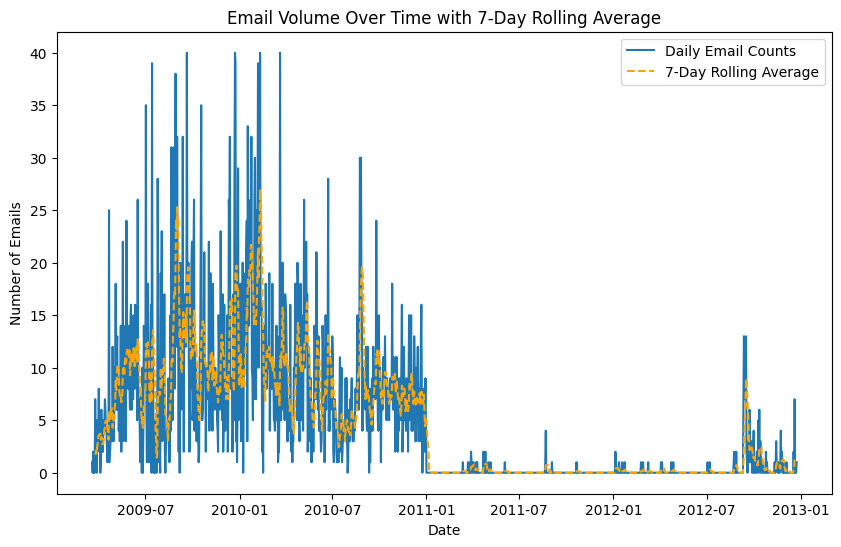

In [ ]:
# Plot rolling 7-day average of email counts
rolling_avg = daily_email_counts.rolling(window=7).mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_email_counts, label='Daily Email Counts')
plt.plot(rolling_avg, label='7-Day Rolling Average', linestyle='--', color='orange')
plt.title('Email Volume Over Time with 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.legend()
plt.show()


Identify any patterns or anomalies in the volume of emails sent and received.

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for daily email counts
z_scores = zscore(daily_email_counts)

# Define a threshold for anomaly detection
threshold = 3

# Identify dates with anomalies
anomalies = daily_email_counts.index[abs(z_scores) > threshold]

# Print dates with anomalies
print("Dates with Anomalies:", anomalies)


Dates with Anomalies: DatetimeIndex(['2009-06-16', '2009-07-02', '2009-07-14', '2009-07-25',
               '2009-08-21', '2009-08-26', '2009-08-28', '2009-08-29',
               '2009-08-30', '2009-09-01', '2009-09-12', '2009-09-20',
               '2009-10-04', '2009-10-18', '2009-12-11', '2009-12-13',
               '2009-12-22', '2009-12-23', '2009-12-24', '2009-12-29',
               '2010-01-17', '2010-01-22', '2010-01-24', '2010-01-30',
               '2010-01-31', '2010-02-06', '2010-02-08', '2010-02-10',
               '2010-03-21', '2010-05-07', '2010-06-23', '2010-08-24',
               '2010-08-26'],
              dtype='datetime64[ns]', name='ExtractedDateSent', freq=None)


Correlate these with external events or timelines.

In [ ]:
fuzzywuzzy: distance editing